In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook output
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Display up to 150 rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号 '-' 显示为方块的问题

In [4]:
gtd_clean = pd.read_excel("./data/gtd_clean.xlsx")

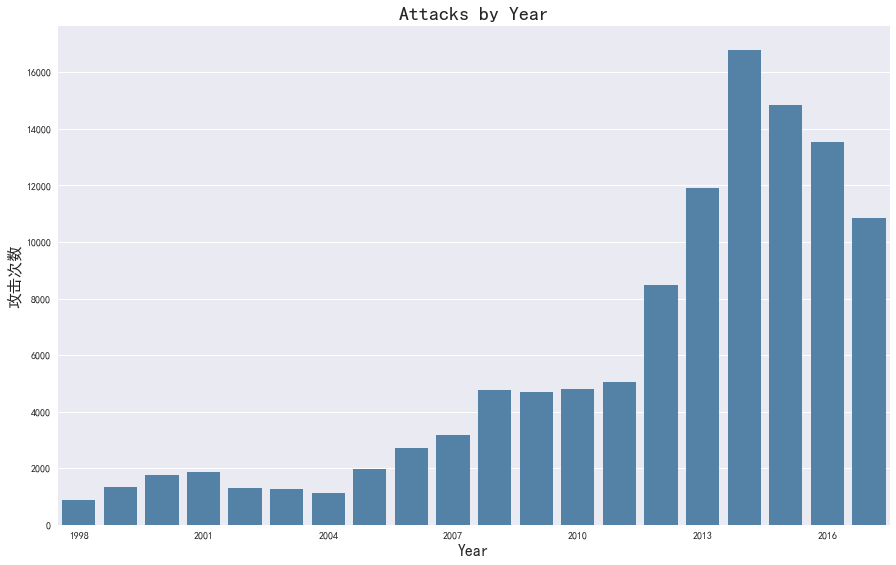

In [8]:
# Make a range of years to show categories with no observations
years = np.arange(1998, 2017)

# Draw a count plot to show the number of attacks each year
plt1 = sns.factorplot("iyear", data=gtd_clean, kind="count", color='steelblue', size=7.6, aspect=1.618)
plt1.set_xticklabels(step=3)
_ = plt.title('Attacks by Year', fontsize = 20)
_ = plt.xlabel('Year', fontsize = 16)
_ = plt.ylabel('攻击次数', fontsize = 16)
plt.show();

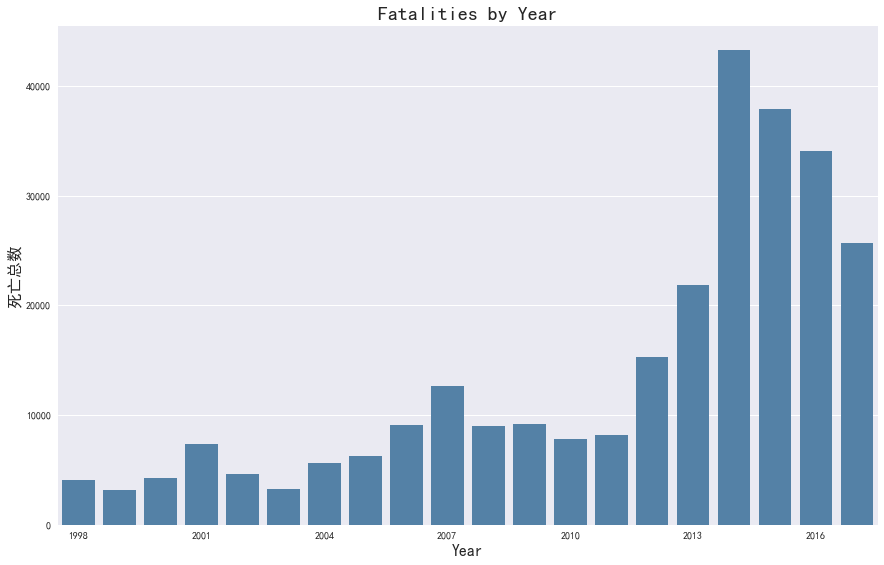

In [10]:
# Make a range of years to show categories with no observations
years = np.arange(1995, 2017)

df1 = gtd_clean[['iyear', 'nkill']]
gp1 = df1.groupby(['iyear'], as_index = False).sum()

# Draw a count plot to show the number of attacks each year
plt1 = sns.factorplot(x = 'iyear', y = 'nkill', data=gp1, kind = 'bar', color='steelblue', size=7.6, aspect=1.618)
plt1.set_xticklabels(step=3)
_ = plt.title('Fatalities by Year', fontsize = 20)
_ = plt.xlabel('Year', fontsize = 16)
_ = plt.ylabel('死亡总数', fontsize = 16)
plt.show();

```py
import folium

# Get a basic world map.
gtd_map = folium.Map(location=[30, 0], zoom_start=2);

# Take a sample of the data points
gtd_sample = gtd_clean.sample(3000);

# Draw markers on the map.
for index, row in gtd_sample.iterrows():
    folium.CircleMarker([row[7], row[8]], radius=0.5, color='#E74C3C', 
                        fill_color='#E74C3C').add_to(gtd_map);


# Show the map
gtd_map
```

In [13]:
gtd_clean.region_txt.value_counts()    # Attacks by Geographical Region

Middle East & North Africa     41240
South Asia                     37419
Sub-Saharan Africa             13069
Southeast Asia                  9639
Eastern Europe                  4242
Western Europe                  3568
South America                   2668
North America                    738
Central Asia                     273
East Asia                        211
Central America & Caribbean       97
Australasia & Oceania             85
Name: region_txt, dtype: int64

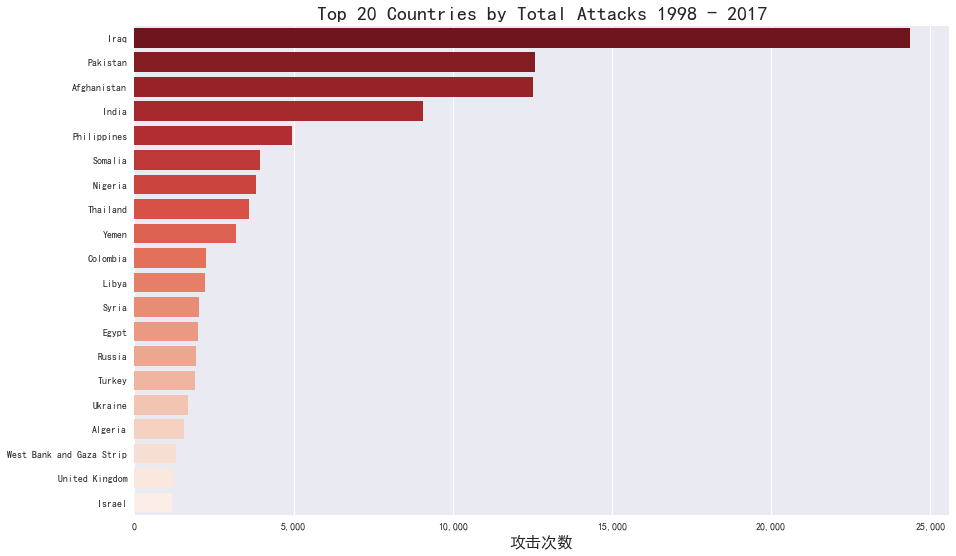

In [15]:
data = gtd_clean[['country_txt']].copy()
data['event_id'] = data.index

# Calculate the number of attacks
data = data.groupby(['country_txt']).agg(['count'])
data = data.reset_index()
data.columns = ['Country','Attacks']

# Order attacks descending
data = data.sort_values('Attacks', ascending=False)[0:20]
data = data.reset_index()

# Set the color palette in reverse
colors = sns.color_palette('Reds', len(data))
colors.reverse()
plt.figure(figsize=(14.6, 9.0))

# Plot bar chart with index as y values
ax = sns.barplot(data.Attacks, data.index, orient='h', palette=colors)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Reset the y labels
ax.set_yticklabels(data.Country)
ax.set_xlabel(xlabel='攻击次数', fontsize=16)
ax.set_title(label='Top 20 Countries by Total Attacks 1998 - 2017', fontsize=20)
plt.show();

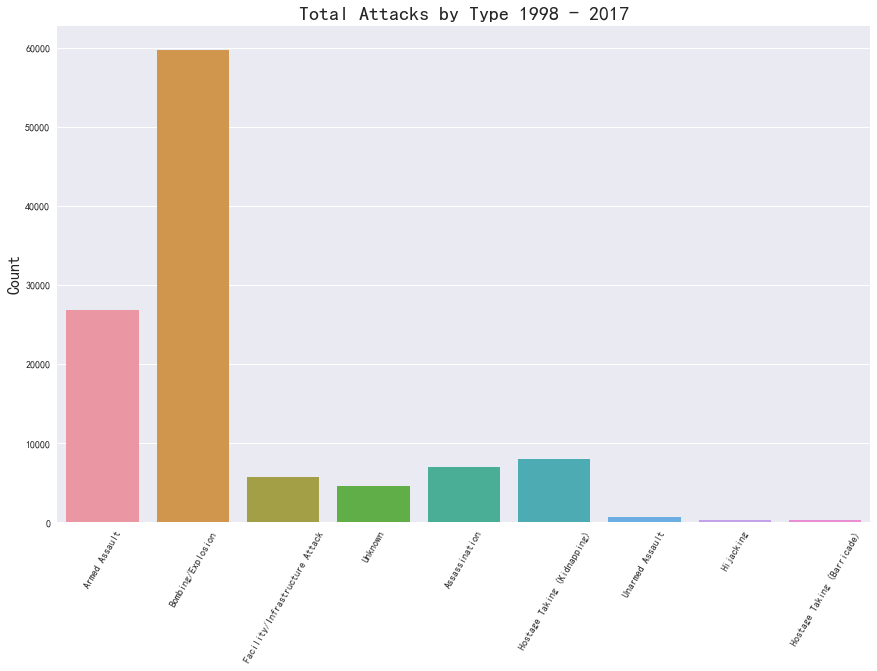

In [16]:
ax = sns.factorplot('attacktype1_txt', data=gtd_clean, size=7.6, aspect=1.618, kind="count")
ax.set_xticklabels(rotation=60)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Type 1998 - 2017', fontsize=20)

plt.show();

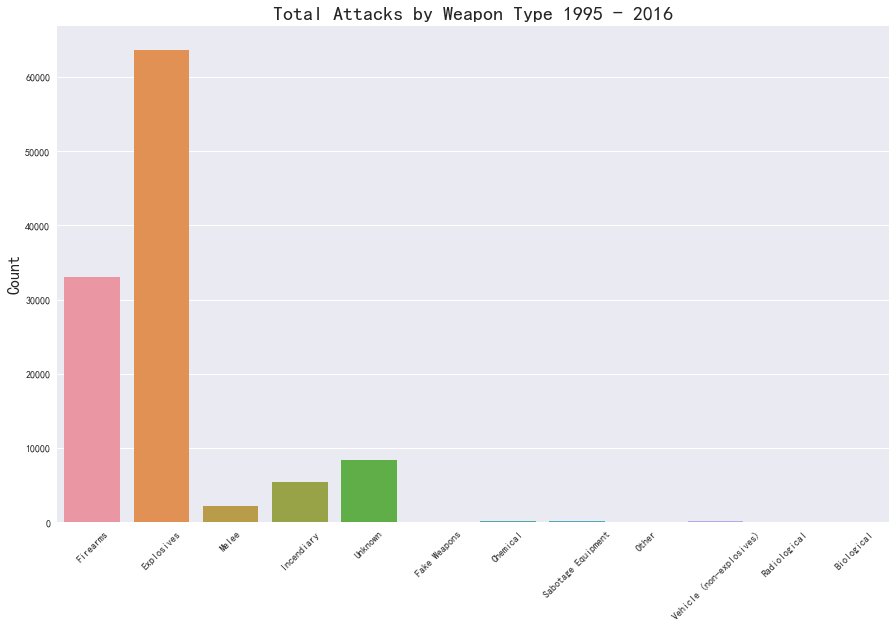

In [17]:
ax = sns.factorplot('weaptype1_txt', data=gtd_clean, size=7.6, aspect=1.618, kind="count")
ax.set_xticklabels(rotation=45)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Weapon Type 1995 - 2016', fontsize=20)
plt.show();

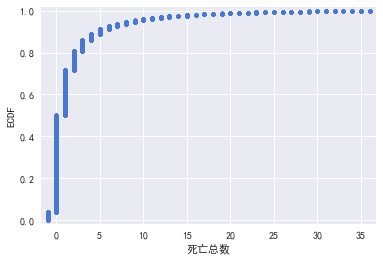

In [21]:
# Remove outliers
nkill_std = gtd_clean['nkill'].std()
nkill_no_outliers = gtd_clean[gtd_clean['nkill'] <= (3 * nkill_std)]

# x is the quantity measured
x = np.sort(nkill_no_outliers['nkill'])

# y is faction of data points that have value smaller than the corresponding x value
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('死亡总数')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [20]:
xtab = pd.crosstab(index = gtd_clean['region_txt'], columns = gtd_clean['INT_IDEO'], margins=True)
xtab

INT_IDEO,-1,0,1,All
region_txt,,,,
Australasia & Oceania,71,4,10,85
Central America & Caribbean,84,11,2,97
Central Asia,232,28,13,273
East Asia,154,47,10,211
Eastern Europe,2765,508,969,4242
Middle East & North Africa,26213,7305,7722,41240
North America,525,65,148,738
South America,599,1953,116,2668
South Asia,20777,14179,2463,37419
